In [ ]:
state_t=0
for input_t in input_sequence:
    output_t=f(input_t,state_t)
    state_t=output_t

In [ ]:
#给出一个具体函数f,包括两个矩阵W U
state_t=0
for input_t in input_sequence:
    output_t=activation(dot(W,input_t)+dot(U,state_t)+b)
    state_t=output_t

In [4]:
#简单RNN的Numpy实现
import numpy as np

timesteps=100         #输入序列的实践部署
input_features=32      #输入特征空间的维度
output_features=63      #输出特征空间的维度

inputs=np.random.random((timesteps,input_features))  #随机噪声

state_t=np.zeros((output_features))   #初始状态：全零向量

W=np.random.random((output_features,input_features))
U=np.random.random((output_features,output_features))
b=np.random.random((output_features,))        #创建随机权重矩阵

successive_outputs=[]
for input_t in inputs:      #input_t 是形状为（input_features,) 的向量
    output_t=np.tanh(np.dot(W,input_t)+np.dot(U,state_t)+b)
    
    successive_outputs.append(output_t)
    
    state_t=output_t
    
final_output_sequence=np.stack(successive_outputs,axis=0)   #输出形状是（timesteps,output_features)的二维张量

In [5]:
print(final_output_sequence)

[[0.99999996 0.99999989 0.99999958 ... 0.99999999 0.99999998 0.99999998]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]


In [8]:
from keras.layers import SimpleRNN,Embedding
from keras.models import Sequential
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [10]:
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [11]:
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [22]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features=10000
maxlen=500
batch_size=32

print('Loading data...')
(input_train,y_train),(input_test,y_test)=imdb.load_data(num_words=max_features)
print(len(input_train),'train sequences')
print(len(input_test),'test sequences')

print('Pad sequences(samples x time)')
input_train=sequence.pad_sequences(input_train,maxlen=maxlen)
input_test=sequence.pad_sequences(input_test,maxlen=maxlen)
print('input_train shape:',input_train.shape)
print('input_test shape:',input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences(samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [23]:
from keras.layers import Dense

model=Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(input_train,y_train,
                 epochs=10,
                 batch_size=128,
                 validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 58s 3ms/step - loss: 0.6199 - acc: 0.6442 - val_loss: 0.5984 - val_acc: 0.6582
Epoch 2/10
20000/20000 [==============================] - 51s 3ms/step - loss: 0.4009 - acc: 0.8290 - val_loss: 0.3742 - val_acc: 0.8436
Epoch 3/10
20000/20000 [==============================] - 51s 3ms/step - loss: 0.3034 - acc: 0.8768 - val_loss: 0.4022 - val_acc: 0.8150
Epoch 4/10
20000/20000 [==============================] - 52s 3ms/step - loss: 0.2508 - acc: 0.9025 - val_loss: 0.3552 - val_acc: 0.8582
Epoch 5/10
20000/20000 [==============================] - 51s 3ms/step - loss: 0.2062 - acc: 0.9232 - val_loss: 0.3764 - val_acc: 0.8568
Epoch 6/10
20000/20000 [==============================] - 50s 2ms/step - loss: 0.1694 - acc: 0.9391 - val_loss: 0.3590 - val_acc: 0.8596
Epoch 7/10
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1370 - acc: 0.9508 - val_loss: 0.4519 - val_acc:

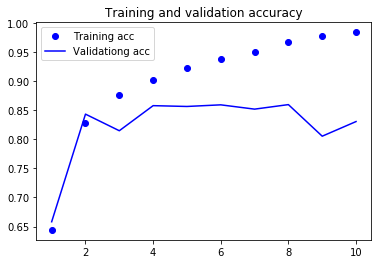

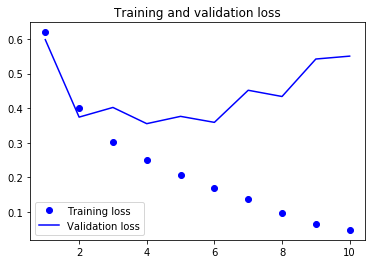

In [25]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validationg acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()